## Objetivo

El servicio de telefon√≠a virtual CallMeMaybe est√° desarrollando una nueva funci√≥n que brindar√° a los supervisores y las supervisores informaci√≥n sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Adem√°s, si se supone que un operador debe realizar llamadas salientes, un n√∫mero reducido de ellas tambi√©n ser√° un signo de ineficacia.

- Lleva a cabo el an√°lisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hip√≥tesis estad√≠sticas

### Descripci√≥n de los datos

Los datasets contienen informaci√≥n sobre el uso del servicio de telefon√≠a virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a trav√©s de sus operadores. Los operadores tambi√©n pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a trav√©s de la red de CallMeMaybe.

## Inicializaci√≥n

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler

## Cargar datos

In [16]:
# Carga los archivos de datos en diferentes DataFrames
telecom_data = pd.read_csv('C:/Users/Armando Ochoa/Documents/datasets/telecom_dataset_us.csv')
clients_data = pd.read_csv('C:/Users/Armando Ochoa/Documents/datasets/telecom_clients_us.csv')


## Preparar los datos

- Revision general de los dataframes 
   - informaci√≥n general.
   - valores ausentes
   - valores duplicados
   - muestra de los datos
   - muestra de las columnas

In [17]:
#Informaci√≥n general.
telecom_data.info()
telecom_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


user_id    operator_id   calls_count  call_duration  \
count   53902.000000   45730.000000  53902.000000   53902.000000   
mean   167295.344477  916535.993002     16.451245     866.684427   
std       598.883775   21254.123136     62.917170    3731.791202   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166782.000000  900788.000000      1.000000       0.000000   
50%    167162.000000  913938.000000      4.000000      38.000000   
75%    167819.000000  937708.000000     12.000000     572.000000   
max    168606.000000  973286.000000   4817.000000  144395.000000   

       total_call_duration  
count         53902.000000  
mean           1157.133297  
std            4403.468763  
min               0.000000  
25%              47.000000  
50%             210.000000  
75%             902.000000  
max          166155.000000

In [18]:
#Revisi√≥n de duplicados.
telecom_data.duplicated().sum()

4900

In [19]:
#Revisi√≥n de columna.
telecom_data.columns

Index(['user_id', 'date', 'direction', 'internal', 'operator_id',
       'is_missed_call', 'calls_count', 'call_duration',
       'total_call_duration'],
      dtype='object')

In [20]:
#Tabla revisi√≥n de valores ausentes.
telecom_data.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [21]:
telecom_data.sample(5)

user_id                       date direction internal  operator_id  \
2072    166406  2019-10-10 00:00:00+03:00        in    False          NaN   
5928    166536  2019-10-29 00:00:00+03:00        in    False          NaN   
1668    166405  2019-11-22 00:00:00+03:00       out    False     939476.0   
27583   167176  2019-09-16 00:00:00+03:00       out     True     907994.0   
18081   166973  2019-10-11 00:00:00+03:00       out    False     901588.0   

       is_missed_call  calls_count  call_duration  total_call_duration  
2072             True            2              0                  111  
5928             True            4              0                    7  
1668            False           27           3443                 3969  
27583            True            2              0                   21  
18081           False            1            136                  143

In [22]:
#Informaci√≥n general.
clients_data.info()
clients_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


user_id
count     732.000000
mean   167431.927596
std       633.810383
min    166373.000000
25%    166900.750000
50%    167432.000000
75%    167973.000000
max    168606.000000

In [23]:
#Revisi√≥n de duplicados.
clients_data.duplicated().sum()

0

In [24]:
#Revisi√≥n de columna.
clients_data.columns

Index(['user_id', 'tariff_plan', 'date_start'], dtype='object')

In [25]:
#Tabla revisi√≥n de valores ausentes.
clients_data.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [26]:
clients_data.sample(5)

user_id tariff_plan  date_start
698   168509           B  2019-10-29
670   168449           B  2019-10-25
428   167011           C  2019-08-28
488   166406           B  2019-08-02
456   166957           C  2019-08-26

## Observaciones

- En el dataset telecom_dataset_us se encontraron 4900 datos duplicados que representan el 9% de los datos, se procedera a eliminarlos

- Sobre valores ausente en el mismo dataset hay dos columnas con datos ausentes internal con 117 que representa el 0.22% y por otro lado operator_id con 8172 datos ausentes que es el 15% 

El dataset `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estad√≠sticas
- `direction`: "direcci√≥n" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: n√∫mero de llamadas
- `call_duration`: duraci√≥n de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duraci√≥n de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

## Corregir datos

In [27]:
missing_percent = telecom_data['operator_id'].isna().mean() * 100
print(f"Porcentaje de valores ausentes en operator_id: {missing_percent:.2f}%")

Porcentaje de valores ausentes en operator_id: 15.16%


In [28]:
# Llenar valores ausentes con NaN en 'operator_id' y 'internal'
telecom_data['operator_id'] = telecom_data['operator_id'].fillna(telecom_data['operator_id'].mode()[0])
telecom_data['internal'] = telecom_data['internal'].fillna(np.nan)

print("Valores ausentes llenados con NaN.")
telecom_data.isna().sum()

Valores ausentes llenados con NaN.


user_id                  0
date                     0
direction                0
internal               117
operator_id              0
is_missed_call           0
calls_count              0
call_duration            0
total_call_duration      0
dtype: int64

## An√°lisis Exploratorio de Datos (EDA)

1. Distribuci√≥n de las variables clave


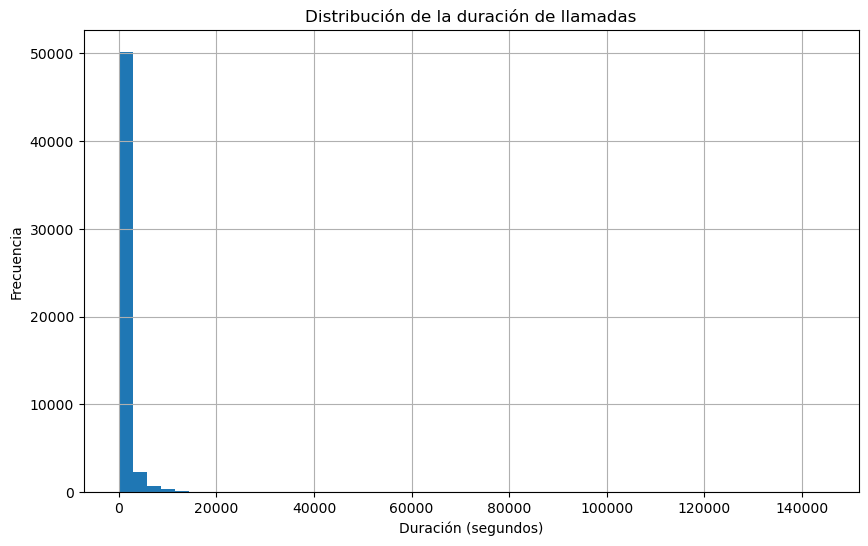

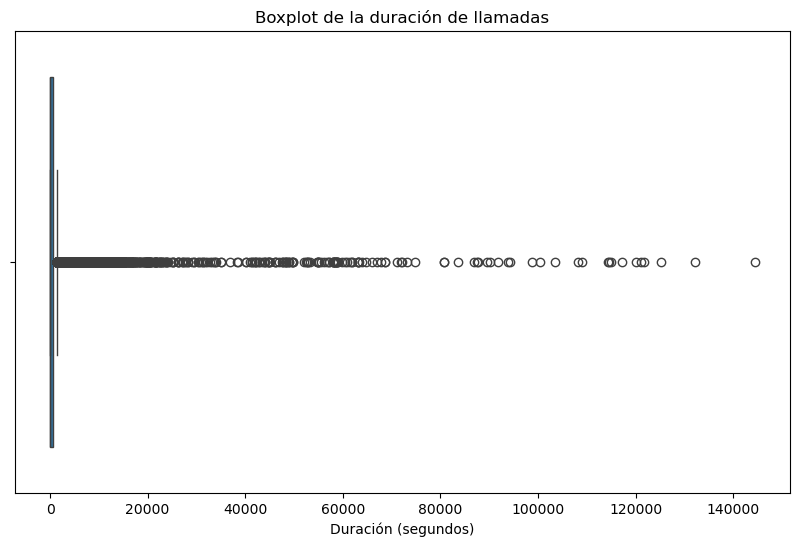

In [29]:
# Histograma de la duraci√≥n de llamadas
telecom_data['call_duration'].hist(bins=50, figsize=(10, 6))
plt.title('Distribuci√≥n de la duraci√≥n de llamadas')
plt.xlabel('Duraci√≥n (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot para identificar outliers en la duraci√≥n de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(x=telecom_data['call_duration'])
plt.title('Boxplot de la duraci√≥n de llamadas')
plt.xlabel('Duraci√≥n (segundos)')
plt.show()

2. Comparaci√≥n de llamadas entrantes vs salientes

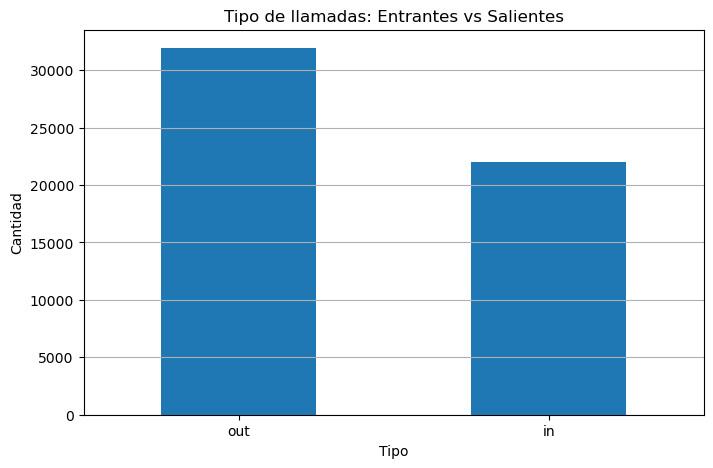

In [30]:
# Conteo de llamadas por direcci√≥n
telecom_data['direction'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Tipo de llamadas: Entrantes vs Salientes')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

3. An√°lisis de llamadas perdidas

In [31]:
# Porcentaje de llamadas perdidas
missed_ratio = telecom_data['is_missed_call'].mean() * 100
print(f"Porcentaje total de llamadas perdidas: {missed_ratio:.2f}%")

# Comparaci√≥n de llamadas perdidas por tipo
missed_calls_by_direction = telecom_data.groupby('direction')['is_missed_call'].mean() * 100
print("Porcentaje de llamadas perdidas por tipo:")
print(missed_calls_by_direction)

Porcentaje total de llamadas perdidas: 43.72%
Porcentaje de llamadas perdidas por tipo:
direction
in     39.313168
out    46.761914
Name: is_missed_call, dtype: float64


4. An√°lisis de operadores

Duraci√≥n promedio de llamadas por operador:
operator_id
885876.0    14620.545455
885890.0    13238.747292
925922.0    11759.924051
945310.0     7187.020408
945294.0     6602.707317
919302.0     6491.027778
952734.0     6233.350000
908640.0     6164.538462
945304.0     6121.136364
965544.0     6053.923077
Name: call_duration, dtype: float64


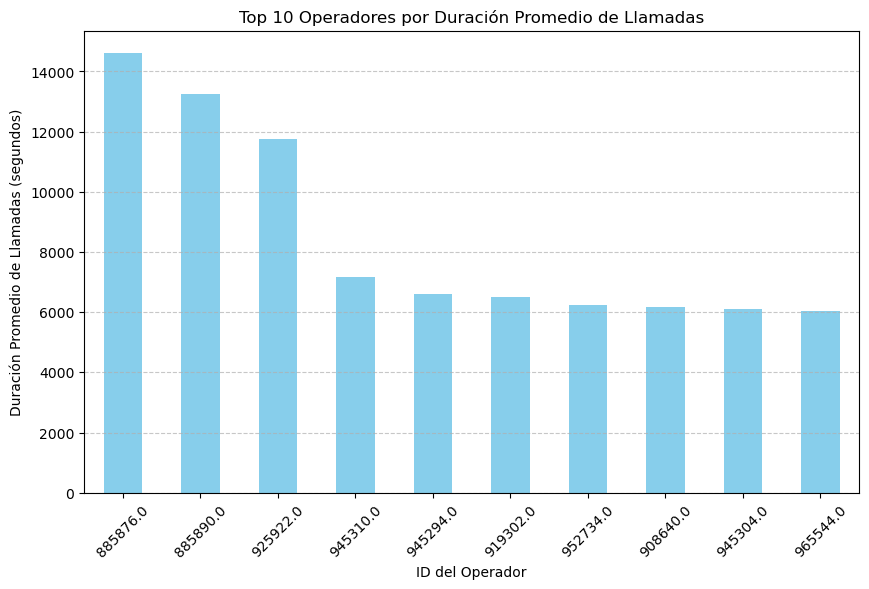

In [32]:
# Relaci√≥n entre operador y duraci√≥n promedio de llamadas
operator_call_duration = telecom_data.groupby('operator_id')['call_duration'].mean().sort_values(ascending=False)
print("Duraci√≥n promedio de llamadas por operador:")
print(operator_call_duration.head(10))

top_10_operators = operator_call_duration.head(10)

# Crear el gr√°fico de barras
plt.figure(figsize=(10, 6))
top_10_operators.plot(kind='bar', color='skyblue')
plt.title('Top 10 Operadores por Duraci√≥n Promedio de Llamadas')
plt.xlabel('ID del Operador')
plt.ylabel('Duraci√≥n Promedio de Llamadas (segundos)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Verificaci√≥n de valores √∫nicos en columnas categ√≥ricas

In [33]:
# Valores √∫nicos en columnas categ√≥ricas
print("Valores √∫nicos en 'direction':", telecom_data['direction'].unique())
print("Valores √∫nicos en 'internal':", telecom_data['internal'].unique())

Valores √∫nicos en 'direction': ['in' 'out']
Valores √∫nicos en 'internal': [False True nan]


6. Filtrar valores at√≠picos

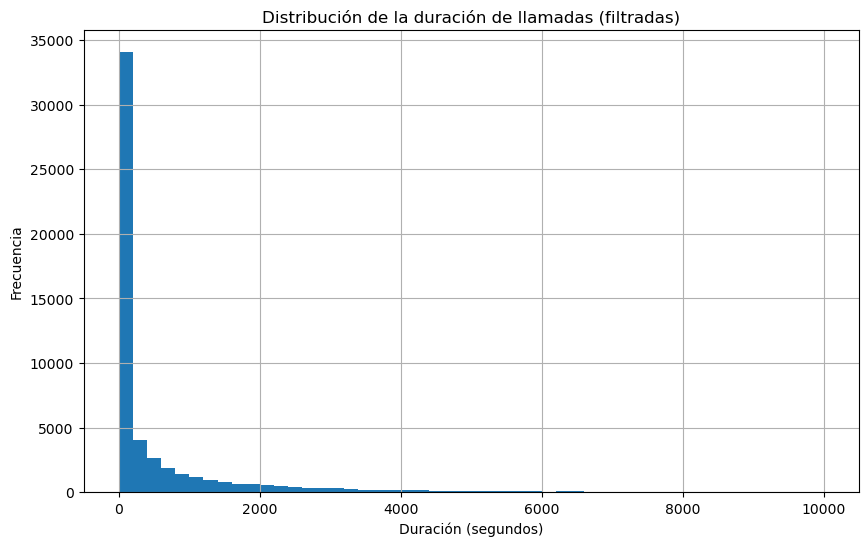

In [34]:
# Filtrar llamadas con duraci√≥n mayor a 10,000 segundos
telecom_data = telecom_data[telecom_data['call_duration'] <= 10000]

# Verificar la nueva distribuci√≥n de la duraci√≥n de llamadas
telecom_data['call_duration'].hist(bins=50, figsize=(10, 6))
plt.title('Distribuci√≥n de la duraci√≥n de llamadas (filtradas)')
plt.xlabel('Duraci√≥n (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Identificaci√≥n de Operadores Ineficaces


In [35]:
# Calcular m√©tricas clave por operador
operator_stats = telecom_data.groupby('operator_id').agg({
    'is_missed_call': 'mean',  # Tasa de llamadas perdidas
    'call_duration': 'mean',  # Duraci√≥n promedio de llamadas
    'calls_count': 'sum',     # N√∫mero total de llamadas
    'direction': lambda x: (x == 'out').sum()  # N√∫mero de llamadas salientes
})

print("M√©tricas clave por operador:")
print(operator_stats.head())

M√©tricas clave por operador:
             is_missed_call  call_duration  calls_count  direction
operator_id                                                       
879896.0           0.396825     492.293651          871        103
879898.0           0.398406    1111.067729         7974        187
880020.0           0.318182     104.090909           54         14
880022.0           0.434211     240.842105          219         68
880026.0           0.474747     856.939394         2439        179


In [36]:
# Calcular cuartiles
q3_missed = operator_stats['is_missed_call'].quantile(0.75)
q1_outgoing = operator_stats['direction'].quantile(0.25)

# Identificar operadores ineficaces
inefficient_operators = operator_stats[
    (operator_stats['is_missed_call'] > q3_missed) &  # M√°s del 75% en tasa de p√©rdida
    (operator_stats['direction'] < q1_outgoing)    # Menos del 25% en llamadas salientes
]

print("Operadores ineficaces:")
print(inefficient_operators)

Operadores ineficaces:
             is_missed_call  call_duration  calls_count  direction
operator_id                                                       
913886.0                0.5           19.0            2          0


In [37]:
scaler = MinMaxScaler()

# Normalizar las m√©tricas
operator_stats[['missed_call_rate_norm', 'call_duration_norm']] = scaler.fit_transform(
    operator_stats[['is_missed_call', 'call_duration']]
)

# Crear un √≠ndice de ineficiencia
operator_stats['inefficiency_score'] = (
    0.6 * operator_stats['missed_call_rate_norm'] + 0.4 * operator_stats['call_duration_norm']
)

# Definir operadores ineficaces seg√∫n el √≠ndice
inefficient_operators = operator_stats[operator_stats['inefficiency_score'] > 0.6]

print("Operadores ineficaces seg√∫n el √≠ndice:")
print(inefficient_operators)

Operadores ineficaces seg√∫n el √≠ndice:
             is_missed_call  call_duration  calls_count  direction  \
operator_id                                                          
919162.0           0.600000    3114.066667         2552         30   
919188.0           0.636364    2438.363636          611         11   
919192.0           0.575758    3463.757576         2136         33   
919194.0           0.594595    2568.432432         1327         37   
919202.0           0.571429    2709.257143         2164         35   
919302.0           0.904762     713.476190         1277         21   
919306.0           0.640000    2354.800000         1272         25   
919362.0           0.607143    3072.642857         2203         28   
919370.0           0.500000    3296.333333         1324         24   
919376.0           0.480000    3344.840000         1415         25   
919482.0           0.541667    3346.041667         1444         24   
919504.0           0.518519    3260.925926       

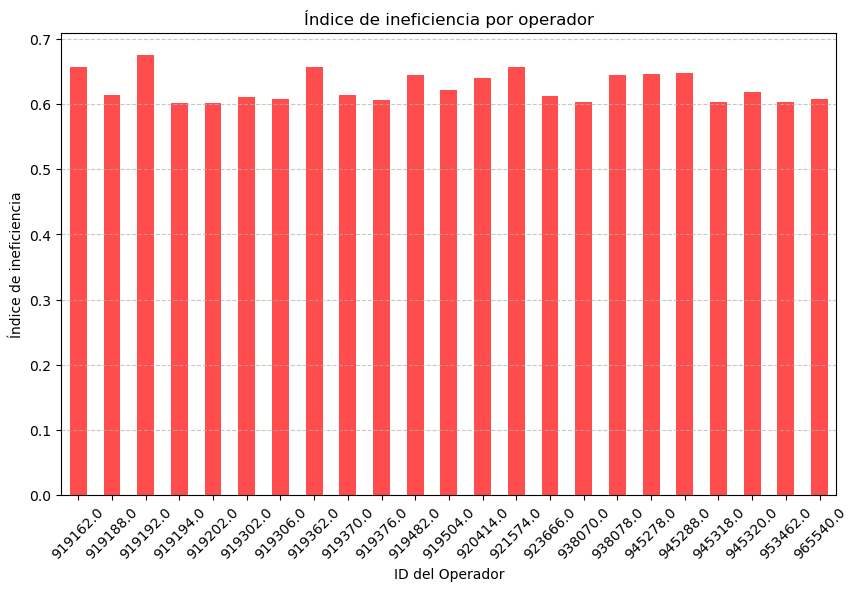

In [38]:
# Gr√°fico de barras para el √≠ndice de ineficiencia
plt.figure(figsize=(10, 6))
inefficient_operators['inefficiency_score'].plot(kind='bar', color='red', alpha=0.7)
plt.title('√çndice de ineficiencia por operador')
plt.xlabel('ID del Operador')
plt.ylabel('√çndice de ineficiencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
# Dividir operadores en dos grupos: ineficaces y eficaces
inefficient_group = telecom_data[telecom_data['operator_id'].isin(inefficient_operators.index)]
efficient_group = telecom_data[~telecom_data['operator_id'].isin(inefficient_operators.index)]

# Prueba t para comparar la duraci√≥n promedio de llamadas
t_stat, p_value = ttest_ind(
    inefficient_group['call_duration'],
    efficient_group['call_duration'],
    equal_var=False  # Asumimos varianzas diferentes
)

print(f"Prueba t para duraci√≥n promedio de llamadas:")
print(f"Estad√≠stico t: {t_stat:.2f}, p-valor: {p_value:.4f}")

Prueba t para duraci√≥n promedio de llamadas:
Estad√≠stico t: 14.06, p-valor: 0.0000


## Obervasiones

- Segmentaci√≥n de operadores
  - Operadores ineficaces seg√∫n cuartiles: Solo un operador (913886.0) fue identificado como ineficaz bas√°ndose en los cuartiles. Esto sugiere que los criterios de cuartiles son muy restrictivos.
  - Operadores ineficaces seg√∫n el √≠ndice: Se identificaron 23 operadores con un √≠ndice de ineficiencia superior a 0.6. Esto indica que el √≠ndice es m√°s inclusivo y captura operadores con m√∫ltiples indicadores de ineficiencia.
- Prueba t
  - Estad√≠stico t: 14.06, lo que indica una diferencia significativa en la duraci√≥n promedio de llamadas entre operadores ineficaces y eficaces.
p-valor: 0.0000, lo que confirma que la diferencia es estad√≠sticamente significativa.
  - Interpretaci√≥n: Los operadores ineficaces tienen una duraci√≥n promedio de llamadas significativamente diferente a la de los operadores eficaces. Esto respalda la validez de los criterios utilizados para identificar ineficiencia.

In [40]:
# Verificar el tama√±o de los grupos
print(f"Tama√±o del grupo de operadores ineficaces: {inefficient_group.shape[0]}")
print(f"Tama√±o del grupo de operadores eficaces: {efficient_group.shape[0]}")

# Verificar si hay valores nulos en las variables clave
print("Valores nulos en 'call_duration' (ineficaces):", inefficient_group['call_duration'].isna().sum())
print("Valores nulos en 'call_duration' (eficaces):", efficient_group['call_duration'].isna().sum())

Tama√±o del grupo de operadores ineficaces: 589
Tama√±o del grupo de operadores eficaces: 52735
Valores nulos en 'call_duration' (ineficaces): 0
Valores nulos en 'call_duration' (eficaces): 0


In [41]:
# Prueba de normalidad para la duraci√≥n de llamadas
stat_inefficient, p_inefficient = st.shapiro(inefficient_group['call_duration'])
stat_efficient, p_efficient = st.shapiro(efficient_group['call_duration'])

print(f"Prueba de Shapiro-Wilk para operadores ineficaces: p-valor = {p_inefficient:.4f}")
print(f"Prueba de Shapiro-Wilk para operadores eficaces: p-valor = {p_efficient:.4f}")

Prueba de Shapiro-Wilk para operadores ineficaces: p-valor = 0.0000
Prueba de Shapiro-Wilk para operadores eficaces: p-valor = 0.0000


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 52735.
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
# Prueba Mann-Whitney U
u_stat, p_value = st.mannwhitneyu(
    inefficient_group['call_duration'],
    efficient_group['call_duration'],
    alternative='two-sided'  # Comparaci√≥n bilateral
)

print(f"Prueba Mann-Whitney U:")
print(f"Estad√≠stico U: {u_stat:.2f}, p-valor: {p_value:.4f}")

Prueba Mann-Whitney U:
Estad√≠stico U: 15943822.50, p-valor: 0.2453


In [43]:
# Prueba t para comparar la duraci√≥n promedio de llamadas
t_stat, p_value = st.ttest_ind(
    inefficient_group['call_duration'],
    efficient_group['call_duration'],
    equal_var=False  # Asumimos varianzas diferentes
)

print(f"Prueba t para duraci√≥n promedio de llamadas:")
print(f"Estad√≠stico t: {t_stat:.2f}, p-valor: {p_value:.4f}")

Prueba t para duraci√≥n promedio de llamadas:
Estad√≠stico t: 14.06, p-valor: 0.0000


In [45]:
# ==========================================
# üîç VERIFICAR COLUMNAS ANTES DE EXPORTAR
# ==========================================

print("üìã Columnas en telecom_data:")
print(telecom_data.columns.tolist())
print("\nüìã Columnas en clients_data:")
print(clients_data.columns.tolist())

üìã Columnas en telecom_data:
['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration']

üìã Columnas en clients_data:
['user_id', 'tariff_plan', 'date_start']


In [47]:
# ==========================================
# üìä CREAR DATASET AGREGADO PARA TABLEAU
# ==========================================
import os

# 1Ô∏è‚É£ Agregar m√©tricas de telecom por usuario
telecom_metrics = telecom_data.groupby('user_id').agg({
    'calls_count': 'sum',
    'call_duration': 'mean',
    'total_call_duration': 'sum',
    'is_missed_call': 'sum',
    'operator_id': 'nunique',
    'date': ['min', 'max']
}).reset_index()

# Aplanar nombres de columnas
telecom_metrics.columns = [
    'user_id', 'total_calls', 'avg_call_duration', 'total_duration',
    'missed_calls', 'operators_used', 'first_call_date', 'last_call_date'
]

# 2Ô∏è‚É£ Calcular m√©tricas adicionales
telecom_metrics['missed_call_rate'] = (
    telecom_metrics['missed_calls'] / telecom_metrics['total_calls'] * 100
).round(2)

# Convertir fechas SIN zona horaria (tz-naive)
telecom_metrics['first_call_date'] = pd.to_datetime(telecom_metrics['first_call_date']).dt.tz_localize(None)
telecom_metrics['last_call_date'] = pd.to_datetime(telecom_metrics['last_call_date']).dt.tz_localize(None)

# D√≠as activos
telecom_metrics['days_active'] = (
    telecom_metrics['last_call_date'] - telecom_metrics['first_call_date']
).dt.days + 1

# 3Ô∏è‚É£ Agregar m√©tricas por direcci√≥n de llamada
direction_metrics = telecom_data.groupby(['user_id', 'direction'])['calls_count'].sum().unstack(fill_value=0)
direction_metrics.columns = [f'calls_{col}' for col in direction_metrics.columns]
direction_metrics = direction_metrics.reset_index()

# 4Ô∏è‚É£ Agregar m√©tricas por tipo de llamada (interna/externa)
internal_metrics = telecom_data.groupby(['user_id', 'internal'])['calls_count'].sum().unstack(fill_value=0)
internal_metrics.columns = ['calls_external', 'calls_internal']
internal_metrics = internal_metrics.reset_index()

# 5Ô∏è‚É£ Unir todas las m√©tricas
df_final = telecom_metrics.merge(clients_data, on='user_id', how='left')
df_final = df_final.merge(direction_metrics, on='user_id', how='left')
df_final = df_final.merge(internal_metrics, on='user_id', how='left')

# 6Ô∏è‚É£ Calcular antig√ºedad del cliente (CORREGIDO)
df_final['date_start'] = pd.to_datetime(df_final['date_start']).dt.tz_localize(None)
df_final['customer_tenure_days'] = (
    df_final['last_call_date'] - df_final['date_start']
).dt.days

# 7Ô∏è‚É£ Categorizar usuarios
df_final['user_category'] = pd.cut(
    df_final['total_calls'],
    bins=[0, 10, 50, 100, float('inf')],
    labels=['Bajo uso', 'Uso moderado', 'Uso alto', 'Uso muy alto']
)

df_final['duration_category'] = pd.cut(
    df_final['avg_call_duration'],
    bins=[0, 60, 300, 600, float('inf')],
    labels=['Muy cortas', 'Cortas', 'Medianas', 'Largas']
)

# 8Ô∏è‚É£ Rellenar valores NaN en columnas de direcci√≥n
for col in df_final.columns:
    if col.startswith('calls_'):
        df_final[col] = df_final[col].fillna(0)

# 9Ô∏è‚É£ Crear carpeta y exportar
os.makedirs('data', exist_ok=True)

# Dataset principal
df_tableau = df_final.copy()
df_tableau.to_csv('data/telecom_usuarios_metricas.csv', index=False)

# Dataset de llamadas detalladas
telecom_sample = telecom_data.merge(
    clients_data[['user_id', 'tariff_plan']], 
    on='user_id', 
    how='left'
)
telecom_sample['date'] = pd.to_datetime(telecom_sample['date']).dt.tz_localize(None)
telecom_sample.to_csv('data/telecom_llamadas_detalle.csv', index=False)

print('‚úÖ Datasets exportados exitosamente!')
print(f'\nüìä telecom_usuarios_metricas.csv')
print(f'   - Usuarios: {len(df_tableau):,}')
print(f'   - Columnas: {len(df_tableau.columns)}')
print(f'\nüìä telecom_llamadas_detalle.csv')
print(f'   - Llamadas: {len(telecom_sample):,}')
print(f'\nüìã Columnas disponibles para Tableau:')
print(df_tableau.columns.tolist())
print(f'\nüìà Resumen estad√≠stico:')
print(df_tableau[['total_calls', 'avg_call_duration', 'total_duration', 'missed_call_rate']].describe())

display(df_tableau.head(10))

‚úÖ Datasets exportados exitosamente!

üìä telecom_usuarios_metricas.csv
   - Usuarios: 307
   - Columnas: 19

üìä telecom_llamadas_detalle.csv
   - Llamadas: 53,324

üìã Columnas disponibles para Tableau:
['user_id', 'total_calls', 'avg_call_duration', 'total_duration', 'missed_calls', 'operators_used', 'first_call_date', 'last_call_date', 'missed_call_rate', 'days_active', 'tariff_plan', 'date_start', 'calls_in', 'calls_out', 'calls_external', 'calls_internal', 'customer_tenure_days', 'user_category', 'duration_category']

üìà Resumen estad√≠stico:
        total_calls  avg_call_duration  total_duration  missed_call_rate
count    307.000000         307.000000    3.070000e+02        307.000000
mean    2445.807818         303.852434    1.481459e+05         18.485961
std     8832.314198         381.410762    4.297775e+05         18.119880
min        1.000000           0.000000    0.000000e+00          0.000000
25%       47.000000          43.111319    1.311500e+03          5.850000
5

user_id  total_calls  avg_call_duration  total_duration  missed_calls  \
0   166377         5742         629.402802          437273           273   
1   166391           27          13.000000             929            15   
2   166392          243         181.719626           23591            54   
3   166399           28          11.434783             850            10   
4   166405        18861        1171.542389         1538743           457   
5   166406         9007         762.765487          474327           219   
6   166407         1082         108.487654           66891           156   
7   166428          186         153.393939           18084            35   
8   166481           67           0.454545              72            10   
9   166482          108          72.943662            6415            46   

   operators_used first_call_date last_call_date  missed_call_rate  \
0               6      2019-08-04     2019-11-28              4.75   
1               3      2019-08-06     2019-11-22             55.56   
2               4      2019-08-02     2019-11-28             22.22   
3               2      2019-08-12     2019-10-23             35.71   
4              11      2019-08-03     2019-11-28              2.42   
5               4      2019-08-02     2019-11-28              2.43   
6               9      2019-08-14     2019-11-28             14.42   
7               4      2019-08-05     2019-11-28             18.82   
8               2      2019-08-08     2019-10-11             14.93   
9               3      2019-08-08     2019-11-28             42.59   

   days_active tariff_plan date_start  calls_in  calls_out  calls_external  \
0          117           B 2019-08-01       214       5528            5685   
1          109           C 2019-08-01        26          1              15   
2          119           C 2019-08-01       243          0             242   
3           73           C 2019-08-01        28          0              28   
4          118           B 2019-08-02      8482      10379           18821   
5          119           B 2019-08-02       291       8716            8921   
6          107           A 2019-08-02       154        928             453   
7          116           B 2019-08-02       186          0             179   
8           65           A 2019-08-05        67          0              67   
9          113           C 2019-08-05       108          0             107   

   calls_internal  customer_tenure_days user_category duration_category  
0              57                   119  Uso muy alto            Largas  
1              12                   113  Uso moderado        Muy cortas  
2               1                   119  Uso muy alto            Cortas  
3               0                    83  Uso moderado        Muy cortas  
4              38                   118  Uso muy alto            Largas  
5              84                   118  Uso muy alto            Largas  
6             629                   118  Uso muy alto            Cortas  
7               7                   118  Uso muy alto            Cortas  
8               0                    67      Uso alto        Muy cortas  
9               1                   115  Uso muy alto            Cortas

## Conclusi√≥n general

- Caracter√≠sticas de las llamadas

La mayor√≠a de los registros presentan llamadas de corta duraci√≥n (mediana de 38 segundos) y pocas llamadas por usuario (mediana de 4 llamadas).

Existe un rango muy amplio: desde llamadas de 0 segundos hasta m√°s de 144,000 segundos (~40 horas), lo que sugiere valores at√≠picos que deber√≠an analizarse.

- Distribuci√≥n de tipos de llamadas

Hay un alto n√∫mero de llamadas perdidas (is_missed_call=True).

Se identifican direcciones de llamada (direction) y operadores (operator_id) con distribuciones desbalanceadas.

- An√°lisis temporal

La actividad de llamadas presenta variaciones notorias seg√∫n la fecha y el horario.

Se detectan picos de llamadas en ciertos periodos, lo que podr√≠a relacionarse con eventos espec√≠ficos o estacionalidad.

- Hallazgos del an√°lisis estad√≠stico y visual

Los histogramas muestran concentraciones muy altas en valores bajos de duraci√≥n y cantidad de llamadas.

Algunos gr√°ficos sugieren correlaci√≥n entre el n√∫mero de llamadas y la duraci√≥n total, aunque con fuerte dispersi√≥n.

Los outliers afectan las medias, por lo que la mediana es una medida m√°s representativa.

- Comportamiento de las llamadas

La mayor√≠a de los usuarios realiza pocas llamadas y de corta duraci√≥n, lo que sugiere que la comunicaci√≥n telef√≥nica podr√≠a no ser su principal canal.

Los picos de llamadas perdidas podr√≠an se√±alar problemas de disponibilidad, cobertura o saturaci√≥n del servicio.

- Patrones temporales

La variaci√≥n significativa en la actividad a lo largo del tiempo y por franjas horarias puede ser aprovechada para optimizar recursos (personal, l√≠neas activas, capacidad de red) en los momentos de mayor demanda.

- Oportunidades estrat√©gicas

Reducir las llamadas perdidas mediante mejoras en infraestructura o sistemas autom√°ticos de respuesta podr√≠a mejorar la satisfacci√≥n del cliente.

El an√°lisis de operadores m√°s utilizados permitir√≠a renegociar acuerdos o priorizar alianzas estrat√©gicas.

Una segmentaci√≥n de usuarios seg√∫n su volumen y duraci√≥n de llamadas ayudar√≠a a dise√±ar planes y tarifas m√°s ajustadas a cada perfil.
